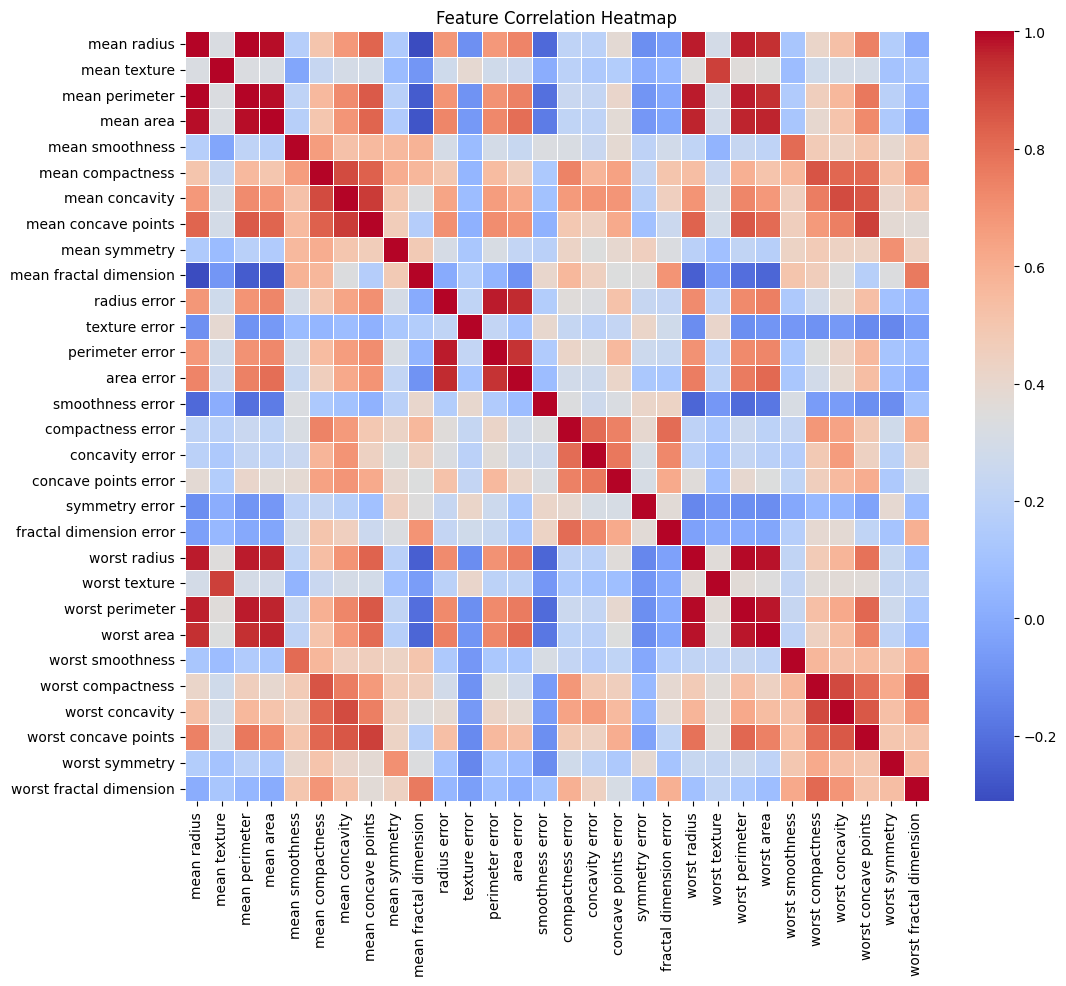

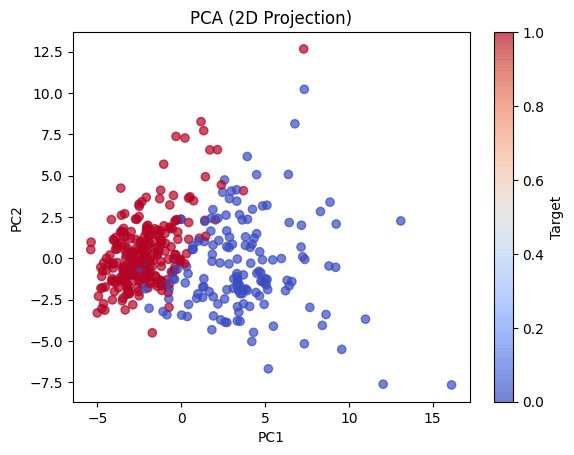

All Features Accuracy: 0.9649
Lasso Selected Accuracy: 0.9649
RFE Selected Accuracy: 0.9591
Tree-based Selected Accuracy: 0.9708

Accuracy Comparison:
         Method  Accuracy
0  All Features  0.964912
1         Lasso  0.964912
2           RFE  0.959064
3    Tree-based  0.970760


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)
lasso_selected = np.where(lasso.coef_ != 0)[0]
X_train_lasso = X_train_scaled[:, lasso_selected]
X_test_lasso = X_test_scaled[:, lasso_selected]

#RFE
rfe_model = RFE(estimator=LogisticRegression(max_iter=500), n_features_to_select=10)
rfe_model.fit(X_train_scaled, y_train)
X_train_rfe = rfe_model.transform(X_train_scaled)
X_test_rfe = rfe_model.transform(X_test_scaled)

#Tree-based
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)
selector = SelectFromModel(rf_model, prefit=True, threshold="median")
X_train_tree = selector.transform(X_train_scaled)
X_test_tree = selector.transform(X_test_scaled)

#PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='coolwarm', alpha=0.7)
plt.title("PCA (2D Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Target')
plt.show()

#Model Training and Accuracy
def train_and_evaluate(X_tr, X_te, name):
    model = RandomForestClassifier()
    model.fit(X_tr, y_train)
    preds = model.predict(X_te)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc:.4f}")
    return acc

acc_all = train_and_evaluate(X_train_scaled, X_test_scaled, "All Features")
acc_lasso = train_and_evaluate(X_train_lasso, X_test_lasso, "Lasso Selected")
acc_rfe = train_and_evaluate(X_train_rfe, X_test_rfe, "RFE Selected")
acc_tree = train_and_evaluate(X_train_tree, X_test_tree, "Tree-based Selected")

#Accuracy Comparison -
results = pd.DataFrame({
    "Method": ["All Features", "Lasso", "RFE", "Tree-based"],
    "Accuracy": [acc_all, acc_lasso, acc_rfe, acc_tree]
})

print("\nAccuracy Comparison:")
print(results)
